# Duffing Oscillator

### Renata Nésio

## Import libraries 

In [1]:
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
mpl.rcParams['legend.fontsize'] = 10


## State-space representation of Duffing Oscillator

In [2]:
def dvDuffing(x, ux, uy, t):

    delta = 0.1
    beta = 0
    alpha = 1
    
    xd = np.array(np.zeros((2, 1)))

    xd[0] = x[1]
    xd[1] = ux - delta * x[1] - alpha * x[0] - beta * x[0] ** 3

    return (xd.copy())

## 4th Order Runge Kutta

In [3]:
def rkDuffing(x0, ux, uy, h, t):
    # 1st evaluation
    xd = dvDuffing(x0, ux, uy, t)
    savex0 = x0.copy()
    phi = xd.copy()
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 2nd evaluation
    xd = dvDuffing(x0.T, ux, uy, t + 0.5 * h)
    phi = (phi + 2 * xd)
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 3rd evaluation
    xd = dvDuffing(x0, ux, uy, t + 0.5 * h)
    phi = phi + 2 * xd
    for i in range(len(x0)):
        x0[i] = savex0[i] + h * xd[i]

    # 4th evaluation
    xd = dvDuffing(x0, ux, uy, t + h)

    result_x = x0.copy()
    for i in range(len(x0)):
        result_x[i] = savex0[i] + (phi[i] + xd[i]) * h / 6

    return result_x



## Runge Kutta simulation of Duffing Oscillator

In [4]:
t0 = 0
tf = 14
h = 0.1
t = np.arange(t0, tf, h)
[print(i) for i in t if i < 0.1]

x0 = np.array([[1], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)

gama = 1
omega = 1.2
u = np.array([gama * math.cos(omega * i) for i in t]) 

for k in range(1, len(t)):
    result = rkDuffing(x[:, k - 1].copy(), u[k], u[k], h, t[k])
    x[:, k] = result


0.0


## Plots

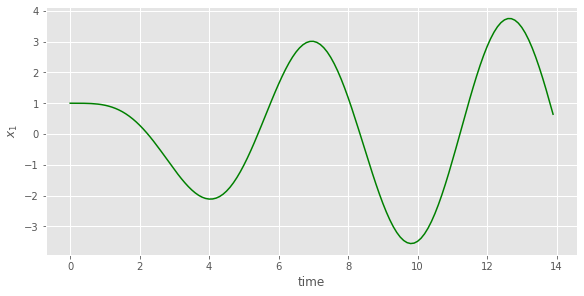

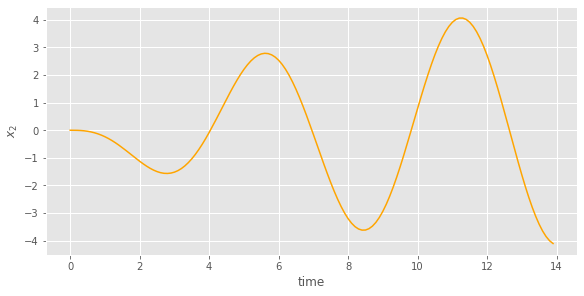

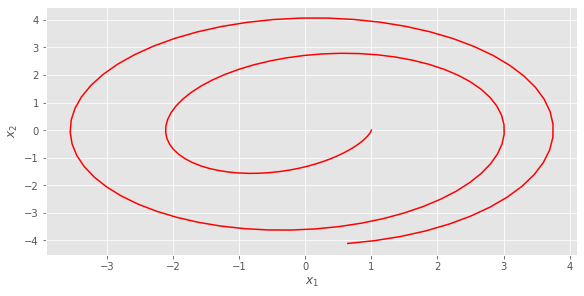

In [16]:
plt.style.use('ggplot')



fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 4))
ax.set(xlabel='time')
ax.set(ylabel=r'$x_1$')
color = ['red', 'green', 'blue', 'yellow', 'orange']
ax.plot(t, x[0, :], color=color[random.randint(0, len(color) - 1)])
ax.grid(color='w', linestyle='-', linewidth=1)
fig.savefig(f'x_1_duffing.png')

fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8,4))
ax1.set(xlabel='time')
ax1.set(ylabel=r'$x_2$')
ax1.plot(t, x[1, :], color=color[random.randint(0, len(color) - 1)])
ax1.grid(color='w', linestyle='-', linewidth=1)
fig1.savefig(f'x_2_duffing.png')

fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(8,4))
ax2.set(xlabel=r'$x_1$')
ax2.set(ylabel=r'$x_2$')
ax2.plot(x[0, :], x[1, :], color=color[random.randint(0, len(color) - 1)])
ax1.grid(color='w', linestyle='-', linewidth=1)
fig2.savefig(f'x_1_x_2_duffing.png')
plt.show()